<a href="https://colab.research.google.com/github/kijoongjkwon/vocal_disable_classification/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# raw data 읽기

## demographics

In [ ]:
demographics = pd.read_csv("/content/drive/MyDrive/데이터 마이닝/project/raw_data/demographics.csv")
demographics

,PID,Gender,Age,Diagnosis
0,BL01,M,46.0,NaN
1,BL02,F,76.0,NaN
2,BL03,F,88.0,NaN
3,BL04,F,42.0,NaN
4,BL05,F,75.0,NaN
...,...,...,...,...
291,SJ30004,Female,20.0,N
292,SJ30005,Female,20.0,N
293,SJ30006,Female,18.0,N
294,SJ30007,Female,19.0,N


In [ ]:
demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PID        296 non-null    object 
 1   Gender     296 non-null    object 
 2   Age        296 non-null    float64
 3   Diagnosis  276 non-null    object 
dtypes: float64(1), object(3)
memory usage: 9.4+ KB


진단(Diagnosis)에서 20개정도가 NaN값

In [ ]:
demographics.Diagnosis.value_counts()

Diagnosis
N                                   89
MTD                                 35
Y                                   25
Unilateral VF paralysis             23
lesions                             16
                                    ..
Bilateral VF paresis                 1
Vocal Fold Scar                      1
atrophy, unilateral Vf paralysis     1
Parkinson's disease, atrophy         1
Chronic cough                        1
Name: count, Length: 62, dtype: int64

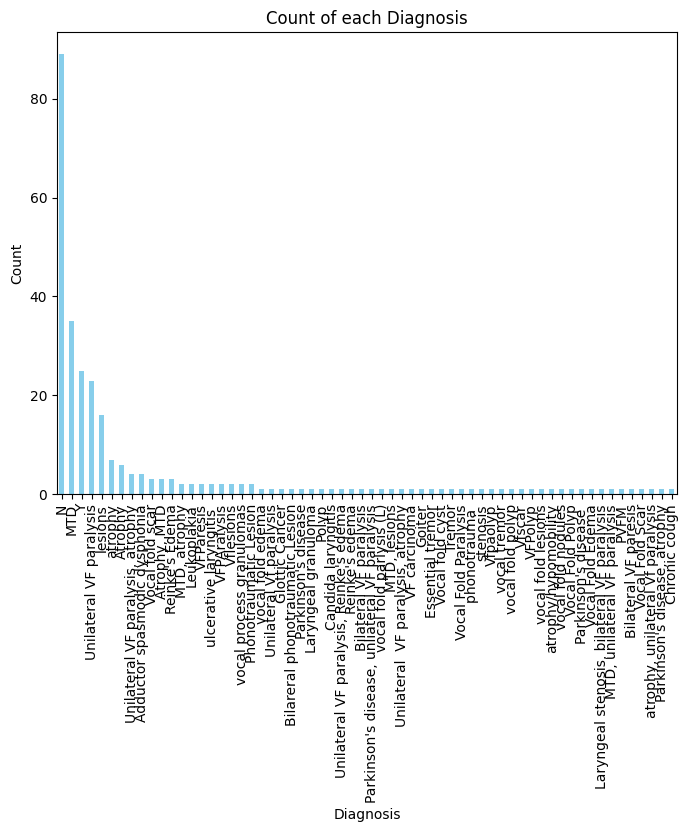

In [ ]:
plt.figure(figsize=(8, 6))
demographics.Diagnosis.value_counts().plot(kind='bar', color='skyblue')
plt.title('Count of each Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

## cape_v_ratings

In [ ]:
cape_v = pd.read_csv("/content/drive/MyDrive/데이터 마이닝/project/raw_data/cape_v_cleaned.csv")
cape_v

,PID,Breathiness_mean,Loudness_mean,Pitch_mean,Roughness_mean,Severity_mean,Strain_mean,Breathiness_std,Loudness_std,Pitch_std,Roughness_std,Severity_std,Strain_std
0,BL01,4.500000,9.666667,6.333333,9.500000,14.500000,4.500000,3.547299,15.477582,8.219219,3.201562,11.339459,3.253204
1,BL02,54.833333,54.833333,36.166667,65.000000,73.833333,58.333333,19.582447,16.506733,9.063051,13.076697,10.040197,13.682917
2,BL03,32.333333,37.166667,41.166667,56.166667,65.833333,44.500000,19.023377,15.720652,12.388391,11.245987,10.884495,14.233177
3,BL04,6.166667,5.833333,12.833333,6.166667,9.500000,5.166667,5.209500,3.484091,12.334459,4.297932,5.315073,4.412734
4,BL05,40.166667,29.500000,15.333333,34.666667,43.000000,26.666667,23.369615,23.963514,14.613540,13.046924,19.104973,15.369523
...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,SJ6007,9.125000,1.125000,0.250000,19.375000,21.000000,12.250000,10.670491,2.260393,0.433013,12.579125,10.099505,13.608361
292,SJ6008,10.625000,0.875000,0.500000,8.125000,10.500000,5.000000,4.181432,1.964529,1.322876,9.688105,7.262920,5.244044
293,SJ7001,0.333333,0.333333,0.333333,3.000000,0.333333,0.833333,0.471405,0.471405,0.471405,3.162278,0.471405,1.067187
294,SJ1001,2.166667,2.166667,1.000000,3.833333,4.833333,5.666667,3.578485,3.578485,1.154701,3.804237,5.209500,8.299933


일단 두 데이터를 합쳐보자.

In [ ]:
merged_df = pd.merge(demographics, cape_v, on="PID", how='inner')
merged_df

,PID,Gender,Age,Diagnosis,Breathiness_mean,Loudness_mean,Pitch_mean,Roughness_mean,Severity_mean,Strain_mean,Breathiness_std,Loudness_std,Pitch_std,Roughness_std,Severity_std,Strain_std
0,BL01,M,46.0,NaN,4.500000,9.666667,6.333333,9.500000,14.500000,4.500000,3.547299,15.477582,8.219219,3.201562,11.339459,3.253204
1,BL02,F,76.0,NaN,54.833333,54.833333,36.166667,65.000000,73.833333,58.333333,19.582447,16.506733,9.063051,13.076697,10.040197,13.682917
2,BL03,F,88.0,NaN,32.333333,37.166667,41.166667,56.166667,65.833333,44.500000,19.023377,15.720652,12.388391,11.245987,10.884495,14.233177
3,BL04,F,42.0,NaN,6.166667,5.833333,12.833333,6.166667,9.500000,5.166667,5.209500,3.484091,12.334459,4.297932,5.315073,4.412734
4,BL05,F,75.0,NaN,40.166667,29.500000,15.333333,34.666667,43.000000,26.666667,23.369615,23.963514,14.613540,13.046924,19.104973,15.369523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,SJ30004,Female,20.0,N,17.500000,3.750000,4.750000,14.125000,20.250000,6.750000,14.044572,5.165995,6.796139,11.483004,15.163690,7.741931
292,SJ30005,Female,20.0,N,3.250000,3.375000,0.250000,10.625000,11.750000,8.500000,4.023369,5.977824,0.433013,11.146048,9.270248,9.848858
293,SJ30006,Female,18.0,N,6.875000,0.250000,0.250000,12.625000,21.375000,19.625000,12.046135,0.661438,0.661438,14.508080,17.570839,15.991697
294,SJ30007,Female,19.0,N,22.875000,10.125000,6.000000,13.500000,22.125000,6.375000,13.577900,12.393925,11.895377,10.943034,12.683035,8.107674


In [ ]:
merged_df.Gender.unique()

array(['M', 'F', 'male', 'female', 'Female', 'Male', 'f', 'm'],
      dtype=object)

In [ ]:
gender_map = {
    'M': 'Male',
    'm': 'Male',
    'male': 'Male',
    'Male': 'Male',
    'F': 'Female',
    'f': 'Female',
    'female': 'Female',
    'Female': 'Female'
}

# Gender 값을 변환
merged_df['Gender'] = merged_df['Gender'].replace(gender_map)
merged_df['Gender'].unique()


array(['Male', 'Female'], dtype=object)

In [ ]:
merged_df.to_csv("/content/drive/MyDrive/데이터 마이닝/project/raw_data/merged_data.csv", index=False)

#EDA - which feature determines diagnosis?

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/데이터 마이닝/project/raw_data/merged_data.csv")
df

,PID,Gender,Age,Diagnosis,Breathiness_mean,Loudness_mean,Pitch_mean,Roughness_mean,Severity_mean,Strain_mean,Breathiness_std,Loudness_std,Pitch_std,Roughness_std,Severity_std,Strain_std
0,BL01,Male,46.0,NaN,4.500000,9.666667,6.333333,9.500000,14.500000,4.500000,3.547299,15.477582,8.219219,3.201562,11.339459,3.253204
1,BL02,Female,76.0,NaN,54.833333,54.833333,36.166667,65.000000,73.833333,58.333333,19.582447,16.506733,9.063051,13.076697,10.040197,13.682917
2,BL03,Female,88.0,NaN,32.333333,37.166667,41.166667,56.166667,65.833333,44.500000,19.023377,15.720652,12.388391,11.245987,10.884495,14.233177
3,BL04,Female,42.0,NaN,6.166667,5.833333,12.833333,6.166667,9.500000,5.166667,5.209500,3.484091,12.334459,4.297932,5.315073,4.412734
4,BL05,Female,75.0,NaN,40.166667,29.500000,15.333333,34.666667,43.000000,26.666667,23.369615,23.963514,14.613540,13.046924,19.104973,15.369523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,SJ30004,Female,20.0,N,17.500000,3.750000,4.750000,14.125000,20.250000,6.750000,14.044572,5.165995,6.796139,11.483004,15.163690,7.741931
292,SJ30005,Female,20.0,N,3.250000,3.375000,0.250000,10.625000,11.750000,8.500000,4.023369,5.977824,0.433013,11.146048,9.270248,9.848858
293,SJ30006,Female,18.0,N,6.875000,0.250000,0.250000,12.625000,21.375000,19.625000,12.046135,0.661438,0.661438,14.508080,17.570839,15.991697
294,SJ30007,Female,19.0,N,22.875000,10.125000,6.000000,13.500000,22.125000,6.375000,13.577900,12.393925,11.895377,10.943034,12.683035,8.107674


std can be seen as reliability of the values of 'means'

In [ ]:
binary_gender_map = {
    'Male': 0,
    'Female': 1
}

df['Gender'] = df['Gender'].replace(binary_gender_map).astype(int)
df

,PID,Gender,Age,Diagnosis,Breathiness_mean,Loudness_mean,Pitch_mean,Roughness_mean,Severity_mean,Strain_mean,Breathiness_std,Loudness_std,Pitch_std,Roughness_std,Severity_std,Strain_std
0,BL01,0,46.0,NaN,4.500000,9.666667,6.333333,9.500000,14.500000,4.500000,3.547299,15.477582,8.219219,3.201562,11.339459,3.253204
1,BL02,1,76.0,NaN,54.833333,54.833333,36.166667,65.000000,73.833333,58.333333,19.582447,16.506733,9.063051,13.076697,10.040197,13.682917
2,BL03,1,88.0,NaN,32.333333,37.166667,41.166667,56.166667,65.833333,44.500000,19.023377,15.720652,12.388391,11.245987,10.884495,14.233177
3,BL04,1,42.0,NaN,6.166667,5.833333,12.833333,6.166667,9.500000,5.166667,5.209500,3.484091,12.334459,4.297932,5.315073,4.412734
4,BL05,1,75.0,NaN,40.166667,29.500000,15.333333,34.666667,43.000000,26.666667,23.369615,23.963514,14.613540,13.046924,19.104973,15.369523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,SJ30004,1,20.0,N,17.500000,3.750000,4.750000,14.125000,20.250000,6.750000,14.044572,5.165995,6.796139,11.483004,15.163690,7.741931
292,SJ30005,1,20.0,N,3.250000,3.375000,0.250000,10.625000,11.750000,8.500000,4.023369,5.977824,0.433013,11.146048,9.270248,9.848858
293,SJ30006,1,18.0,N,6.875000,0.250000,0.250000,12.625000,21.375000,19.625000,12.046135,0.661438,0.661438,14.508080,17.570839,15.991697
294,SJ30007,1,19.0,N,22.875000,10.125000,6.000000,13.500000,22.125000,6.375000,13.577900,12.393925,11.895377,10.943034,12.683035,8.107674


## mapping diagnosis

In [ ]:
df.Diagnosis.unique()

array([nan, 'N', 'Y', 'Vocal fold cyst', 'vocal fold parlysis (L)',
       'Vocal fold scar', 'Bilareral phonotraumatic Lesion',
       'Phonotraumatic Lesion', 'Vocal Fold Paralysis', 'Vocal Fold Scar',
       'Vocal Fold Edema', 'Vocal Fold Polyp', 'stenosis',
       'vocal fold nodules', 'vocal fold lesions', 'Atrophy',
       'vocal fold polyp', 'vocal tremor', 'atrophy', 'phonotrauma ',
       'vocal fold edema', 'VFParesis', 'Vfpaolyp', 'Vflesions',
       'VFPAralysis', 'Vfscar', 'VFPolyp', "Reinke's Edema",
       'atrophy/hypomobility', 'MTD', 'ulcerative laryngitis ', 'lesions',
       'vocal process granulomas',
       'Laryngeal stenosis, bilateral VF paralysis',
       'MTD, unilateral VF paralysis', 'PVFM', 'Bilateral VF paresis',
       'Unilateral VF paralysis, atrophy',
       'atrophy, unilateral Vf paralysis', "Parkinson's disease, atrophy",
       "Parkinson's disease ", 'Unilateral VF paralysis', 'Leukoplakia',
       'Tremor', 'Glottic Cancer', 'Atrophy, MTD', "Pa

some diagnosis values have mutliple diagnosis. spliting by duplication

In [ ]:
new_rows = []

for index, row in df.iterrows():
    labels = str(row['Diagnosis']).split(',') if not pd.isna(row['Diagnosis']) else [np.nan]

    for label in labels:
        new_row = row.copy()
        new_row['Diagnosis'] = str(label).strip() if not pd.isna(label) else np.nan  # If missing, replace it with np.nan again
        new_rows.append(new_row)

dup_df = pd.DataFrame(new_rows)
dup_df

,PID,Gender,Age,Diagnosis,Breathiness_mean,Loudness_mean,Pitch_mean,Roughness_mean,Severity_mean,Strain_mean,Breathiness_std,Loudness_std,Pitch_std,Roughness_std,Severity_std,Strain_std
0,BL01,0,46.0,NaN,4.500000,9.666667,6.333333,9.500000,14.500000,4.500000,3.547299,15.477582,8.219219,3.201562,11.339459,3.253204
1,BL02,1,76.0,NaN,54.833333,54.833333,36.166667,65.000000,73.833333,58.333333,19.582447,16.506733,9.063051,13.076697,10.040197,13.682917
2,BL03,1,88.0,NaN,32.333333,37.166667,41.166667,56.166667,65.833333,44.500000,19.023377,15.720652,12.388391,11.245987,10.884495,14.233177
3,BL04,1,42.0,NaN,6.166667,5.833333,12.833333,6.166667,9.500000,5.166667,5.209500,3.484091,12.334459,4.297932,5.315073,4.412734
4,BL05,1,75.0,NaN,40.166667,29.500000,15.333333,34.666667,43.000000,26.666667,23.369615,23.963514,14.613540,13.046924,19.104973,15.369523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,SJ30004,1,20.0,N,17.500000,3.750000,4.750000,14.125000,20.250000,6.750000,14.044572,5.165995,6.796139,11.483004,15.163690,7.741931
292,SJ30005,1,20.0,N,3.250000,3.375000,0.250000,10.625000,11.750000,8.500000,4.023369,5.977824,0.433013,11.146048,9.270248,9.848858
293,SJ30006,1,18.0,N,6.875000,0.250000,0.250000,12.625000,21.375000,19.625000,12.046135,0.661438,0.661438,14.508080,17.570839,15.991697
294,SJ30007,1,19.0,N,22.875000,10.125000,6.000000,13.500000,22.125000,6.375000,13.577900,12.393925,11.895377,10.943034,12.683035,8.107674


In [ ]:
dup_df.Diagnosis.unique()

array([nan, 'N', 'Y', 'Vocal fold cyst', 'vocal fold parlysis (L)',
       'Vocal fold scar', 'Bilareral phonotraumatic Lesion',
       'Phonotraumatic Lesion', 'Vocal Fold Paralysis', 'Vocal Fold Scar',
       'Vocal Fold Edema', 'Vocal Fold Polyp', 'stenosis',
       'vocal fold nodules', 'vocal fold lesions', 'Atrophy',
       'vocal fold polyp', 'vocal tremor', 'atrophy', 'phonotrauma',
       'vocal fold edema', 'VFParesis', 'Vfpaolyp', 'Vflesions',
       'VFPAralysis', 'Vfscar', 'VFPolyp', "Reinke's Edema",
       'atrophy/hypomobility', 'MTD', 'ulcerative laryngitis', 'lesions',
       'vocal process granulomas', 'Laryngeal stenosis',
       'bilateral VF paralysis', 'unilateral VF paralysis', 'PVFM',
       'Bilateral VF paresis', 'Unilateral VF paralysis',
       'unilateral Vf paralysis', "Parkinson's disease", 'Leukoplakia',
       'Tremor', 'Glottic Cancer', 'Laryngeal granuloma', 'Polyp',
       'Candida laryngitis', "Reinke's edema", 'Unilateral Vf paralysis',
       'Bi

In [ ]:
diagnosis_map = {
    'N': 'Normal',
    'Y': 'Unknown',
    'Vocal fold cyst': 'Cyst',
    'vocal fold parlysis (L)': 'Paralysis',
    'Vocal Fold Paralysis': 'Paralysis',
    'VFPAralysis': 'Paralysis',
    'Unilateral VF paralysis': 'Paralysis',
    'Unilateral Vf paralysis': 'Paralysis',
    'Bilateral VF paralysis': 'Paralysis',
    'bilateral VF paralysis' : 'Paralysis',
    'unilateral VF paralysis': 'Paralysis',
    'unilateral VF paralysis ': 'Paralysis',
    'unliateral VF paralysis' : 'Paralysis',
    'Unilateral  VF paralysis': 'Paralysis',
    'unilateral Vf paralysis' : 'Paralysis',
    'Unilateral VF paralysis': 'Paralysis',
    "Parkinson's disease ": 'Parkinson\'s Disease',
    "Parkinson's disease": 'Parkinson\'s Disease',
    'Vocal Fold Scar': 'Scar',
    'Vocal fold scar': 'Scar',
    'Vfscar': 'Scar',
    'Vocal Fold Edema': 'Edema',
    'vocal fold edema': 'Edema',
    "Reinke's Edema": 'Edema',
    'Vocal Fold Polyp': 'Polyp',
    'vocal fold polyp': 'Polyp',
    'VFPolyp': 'Polyp',
    'Vfpaolyp': 'Polyp',
    'Polyp': 'Polyp',
    'Bilareral phonotraumatic Lesion': 'Lesion',
    'Phonotraumatic Lesion': 'Lesion',
    'vocal fold nodules': 'Lesion',
    'vocal fold lesions': 'Lesion',
    'phonotrauma ': 'Lesion',
    'phonotrauma' :  'Lesion',
    'Vflesions': 'Lesion',
    'lesions': 'Lesion',
    'MTD': 'MTD',
    'atrophy': 'Atrophy',
    'Atrophy': 'Atrophy',
    'atrophy/hypomobility': 'Atrophy',
    'VFParesis': 'Paresis',
    'Bilateral VF paresis': 'Paresis',
    'Tremor': 'Tremor',
    'vocal tremor': 'Tremor',
    'Essential tremor': 'Tremor',
    'Glottic Cancer': 'Cancer',
    'VF carcinoma': 'Cancer',
    'Laryngeal stenosis': 'Stenosis',
    'Laryngeal granuloma': 'Granuloma',
    'vocal process granulomas': 'Granuloma',
    'ulcerative laryngitis ': 'Laryngitis',
    'ulcerative laryngitis': 'Laryngitis',
    'Candida laryngitis': 'Laryngitis',
    'PVFM': 'PVFM',
    'Goiter': 'Goiter',
    'Adductor spasmodic dysphonia': 'Dysphonia',
    'Chronic cough': 'Cough',
    "Reinke's edema" : 'Edema',
    'Unknown': 'Unknown'
}


In [ ]:
dup_df['Diagnosis'] = dup_df['Diagnosis'].replace(diagnosis_map)
dup_df['Diagnosis'].value_counts()

Diagnosis
Normal                 89
MTD                    42
Paralysis              39
Atrophy                26
Lesion                 25
Unknown                25
Edema                   7
Scar                    5
Polyp                   5
Dysphonia               4
Parkinson's Disease     4
Laryngitis              3
Granuloma               3
Paresis                 3
Tremor                  3
Leukoplakia             2
Cancer                  2
Stenosis                1
PVFM                    1
stenosis                1
Goiter                  1
Cyst                    1
Cough                   1
Name: count, dtype: int64

In [ ]:
dup_df.Diagnosis.unique()

array([nan, 'Normal', 'Unknown', 'Cyst', 'Paralysis', 'Scar', 'Lesion',
       'Edema', 'Polyp', 'stenosis', 'Atrophy', 'Tremor', 'phonotrauma',
       'Paresis', 'MTD', 'Laryngitis', 'Granuloma', 'Stenosis', 'PVFM',
       "Parkinson's Disease", 'Leukoplakia', 'Cancer', "Reinke's edema",
       'Goiter', 'Dysphonia', 'Cough'], dtype=object)

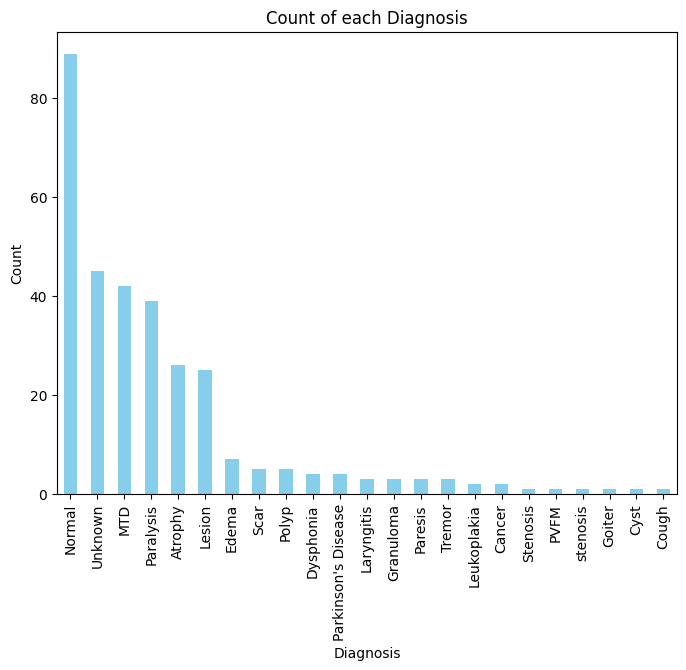

In [ ]:
dup_df['Diagnosis'] = dup_df['Diagnosis'].fillna('Unknown')
plt.figure(figsize=(8, 6))
dup_df.Diagnosis.value_counts().plot(kind='bar', color='skyblue')
plt.title('Count of each Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [ ]:
dup_df

,PID,Gender,Age,Diagnosis,Breathiness_mean,Loudness_mean,Pitch_mean,Roughness_mean,Severity_mean,Strain_mean,Breathiness_std,Loudness_std,Pitch_std,Roughness_std,Severity_std,Strain_std
0,BL01,0,46.0,Unknown,4.500000,9.666667,6.333333,9.500000,14.500000,4.500000,3.547299,15.477582,8.219219,3.201562,11.339459,3.253204
1,BL02,1,76.0,Unknown,54.833333,54.833333,36.166667,65.000000,73.833333,58.333333,19.582447,16.506733,9.063051,13.076697,10.040197,13.682917
2,BL03,1,88.0,Unknown,32.333333,37.166667,41.166667,56.166667,65.833333,44.500000,19.023377,15.720652,12.388391,11.245987,10.884495,14.233177
3,BL04,1,42.0,Unknown,6.166667,5.833333,12.833333,6.166667,9.500000,5.166667,5.209500,3.484091,12.334459,4.297932,5.315073,4.412734
4,BL05,1,75.0,Unknown,40.166667,29.500000,15.333333,34.666667,43.000000,26.666667,23.369615,23.963514,14.613540,13.046924,19.104973,15.369523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,SJ30004,1,20.0,Normal,17.500000,3.750000,4.750000,14.125000,20.250000,6.750000,14.044572,5.165995,6.796139,11.483004,15.163690,7.741931
292,SJ30005,1,20.0,Normal,3.250000,3.375000,0.250000,10.625000,11.750000,8.500000,4.023369,5.977824,0.433013,11.146048,9.270248,9.848858
293,SJ30006,1,18.0,Normal,6.875000,0.250000,0.250000,12.625000,21.375000,19.625000,12.046135,0.661438,0.661438,14.508080,17.570839,15.991697
294,SJ30007,1,19.0,Normal,22.875000,10.125000,6.000000,13.500000,22.125000,6.375000,13.577900,12.393925,11.895377,10.943034,12.683035,8.107674


In [ ]:
dup_df.to_csv("/content/drive/MyDrive/데이터 마이닝/project/processed_data/merged_data.csv", index=False)

In [ ]:
no_unknown = dup_df[dup_df['Diagnosis'] != "Unknown"]
no_unknown.to_csv("/content/drive/MyDrive/데이터 마이닝/project/processed_data/no_unknown.csv", index=False)

In [ ]:
only_unknown = dup_df[dup_df['Diagnosis'] == "Unknown"]
only_unknown.to_csv("/content/drive/MyDrive/데이터 마이닝/project/processed_data/only_unknown.csv", index=False)

## 1. 상관관계 분석

In [ ]:
no_unknown = pd.read_csv("/content/drive/MyDrive/데이터 마이닝/project/processed_data/no_unknown.csv")

In [ ]:
corr_df = no_unknown.drop(columns=["PID"])
corr_df['Diagnosis'] = corr_df['Diagnosis'].astype('category')
corr_df['Diagnosis'] = corr_df['Diagnosis'].cat.codes


correlation_matrix = corr_df.corr()


diagnosis_correlation = correlation_matrix['Diagnosis']


diagnosis_correlation = diagnosis_correlation.abs()


diagnosis_correlation = diagnosis_correlation.sort_values(ascending=False)


print(diagnosis_correlation)

Diagnosis           1.000000
Age                 0.311998
Roughness_mean      0.131381
Severity_mean       0.123728
Roughness_std       0.121098
Pitch_mean          0.114959
Loudness_std        0.110425
Strain_mean         0.108510
Loudness_mean       0.064430
Breathiness_std     0.053179
Breathiness_mean    0.043399
Severity_std        0.035252
Strain_std          0.030513
Gender              0.017475
Pitch_std           0.008290
Name: Diagnosis, dtype: float64


## 2. 피처 중요도 분석 : 랜덤포래스트, 그레디언트 부스팅

### 랜덤 포레스트

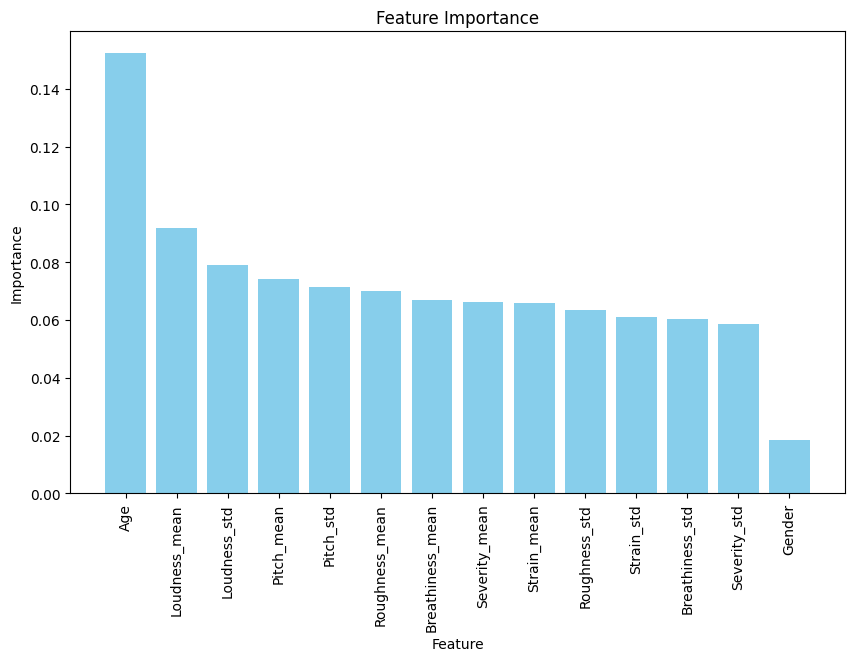

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

no_unknown = no_unknown.drop(columns=["PID"])


X = no_unknown.drop(columns=['Diagnosis'])
y = no_unknown['Diagnosis']


rf_model = RandomForestClassifier()


rf_model.fit(X, y)


feature_importances = rf_model.feature_importances_


feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()


### 그래디언트 부스팅

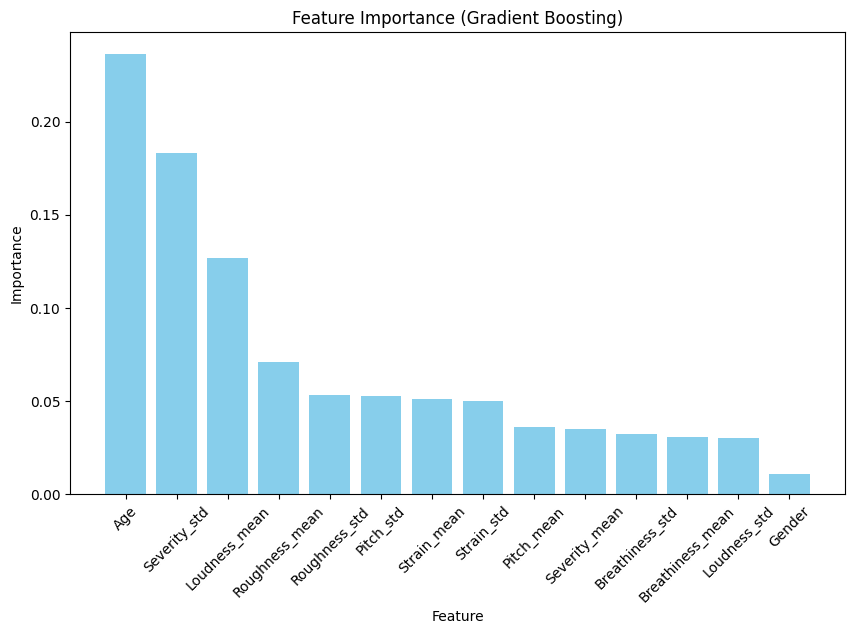

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt


gb_model = GradientBoostingClassifier()


gb_model.fit(X, y)


feature_importances_gb = gb_model.feature_importances_


feature_importance_df_gb = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_gb})
feature_importance_df_gb = feature_importance_df_gb.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df_gb['Feature'], feature_importance_df_gb['Importance'], color='skyblue')
plt.title('Feature Importance (Gradient Boosting)')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()


## 3. 로지스틱 회귀 분석

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


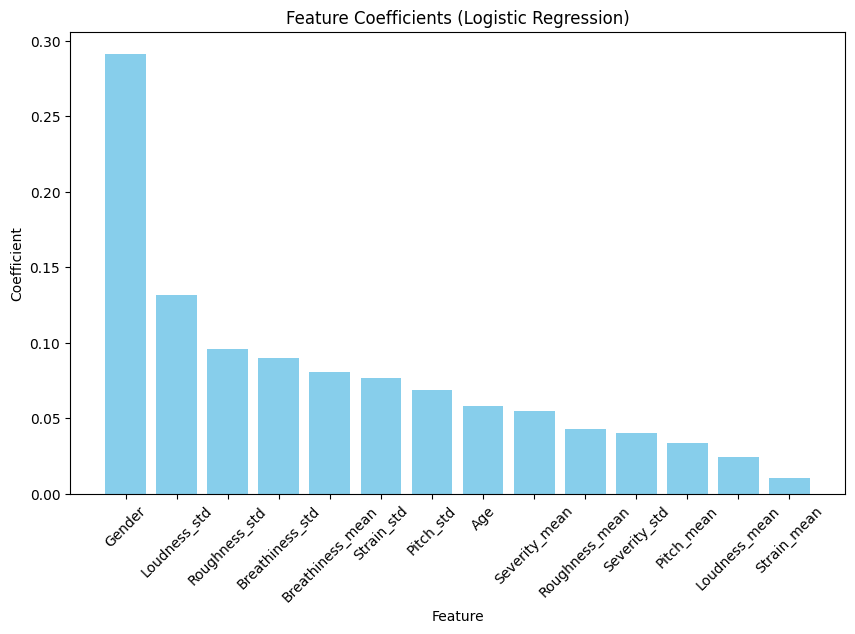

In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np


logreg_model = LogisticRegression()
logreg_model.fit(X, y)
feature_coefficients = logreg_model.coef_[0]


feature_importance_df_lr = pd.DataFrame({'Feature': X.columns, 'Coefficient': np.abs(feature_coefficients)})
feature_importance_df_lr = feature_importance_df_lr.sort_values(by='Coefficient', ascending=False)


plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df_lr['Feature'], feature_importance_df_lr['Coefficient'], color='skyblue')
plt.title('Feature Coefficients (Logistic Regression)')
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.xticks(rotation=45)
plt.show()


## 4. 차원 축소 기법

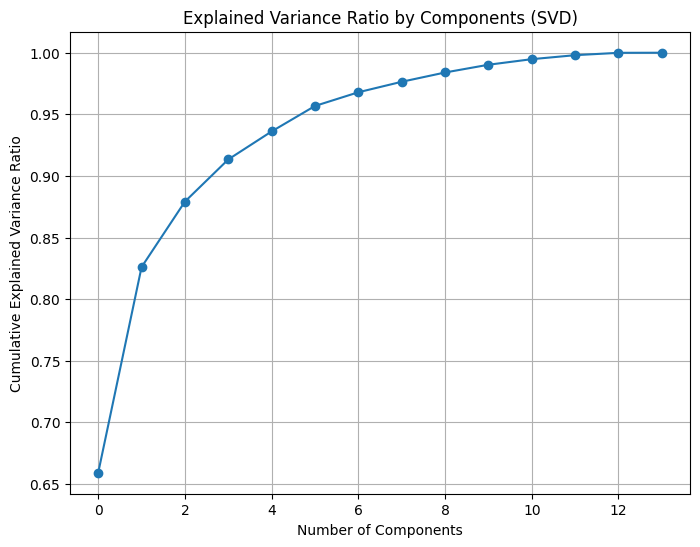

In [ ]:
from sklearn.decomposition import TruncatedSVD


svd_model = TruncatedSVD(n_components=min(X.shape[0], X.shape[1]))

X_svd = svd_model.fit_transform(X)


explained_variance_ratio = svd_model.explained_variance_ratio_

plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(explained_variance_ratio), marker='o', linestyle='-')
plt.title('Explained Variance Ratio by Components (SVD)')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.decomposition import PCA


pca = PCA(n_components=14)


X_pca = pca.fit_transform(X)


pc_columns = ['PC{}'.format(i+1) for i in range(pca.n_components_)]
loading_matrix = pd.DataFrame(pca.components_, columns=X.columns, index=pc_columns)

print("주성분과 원래 특성 간의 상관 관계:")
print(loading_matrix)


주성분과 원래 특성 간의 상관 관계:
        Gender       Age  Breathiness_mean  Loudness_mean  Pitch_mean  \
PC1  -0.000870  0.234662          0.370679       0.409238    0.366307   
PC2   0.002496 -0.962222          0.179052       0.147813    0.030088   
PC3   0.002172  0.104618          0.553989       0.399286   -0.036786   
PC4   0.004823  0.014813         -0.278183       0.120129    0.357987   
PC5   0.007804  0.061622          0.180817      -0.152142   -0.723868   
PC6  -0.004009 -0.006935         -0.246040       0.354749   -0.178635   
PC7  -0.004594  0.034075         -0.200910       0.614174   -0.385806   
PC8  -0.006374 -0.019576         -0.123864       0.082290   -0.062770   
PC9   0.001759 -0.033969         -0.338277       0.101337   -0.039505   
PC10 -0.005102  0.033822          0.278999      -0.007379   -0.113357   
PC11 -0.010996 -0.012176         -0.197895       0.048620   -0.010792   
PC12 -0.006660  0.000331         -0.255243       0.289259    0.024500   
PC13 -0.015791 -0.007709      

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


X = no_unknown.drop(columns=['Diagnosis'])
y = no_unknown['Diagnosis']


pca = PCA(n_components=13)
X_pca = pca.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)


y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("랜덤 포레스트 분류기의 정확도:", accuracy)


랜덤 포레스트 분류기의 정확도: 0.46296296296296297


#select data

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/데이터 마이닝/project/processed_data/no_unknown.csv")
df

,PID,Gender,Age,Diagnosis,Breathiness_mean,Loudness_mean,Pitch_mean,Roughness_mean,Severity_mean,Strain_mean,Breathiness_std,Loudness_std,Pitch_std,Roughness_std,Severity_std,Strain_std
0,LA1001,1,60.0,Normal,2.333333,2.166667,5.166667,3.333333,9.333333,12.166667,1.105542,1.343710,6.282692,0.745356,9.516068,14.993517
1,LA1002,1,33.0,Normal,8.666667,5.333333,5.000000,2.833333,9.666667,11.500000,7.652160,6.155395,5.744563,2.409472,8.634556,11.814539
2,LA1003,0,28.0,Normal,13.000000,21.833333,20.833333,22.333333,29.166667,27.333333,9.165151,19.368502,21.450848,4.570436,8.214148,10.796090
3,LA2001,0,31.0,Normal,10.500000,6.333333,9.166667,17.000000,18.666667,17.000000,12.906717,5.934831,6.491447,10.263203,10.734161,13.190906
4,LA7012,1,25.0,Normal,7.000000,3.833333,5.000000,5.500000,8.000000,4.333333,6.506407,2.733537,4.123106,2.362908,6.683313,3.448027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,SJ30004,1,20.0,Normal,17.500000,3.750000,4.750000,14.125000,20.250000,6.750000,14.044572,5.165995,6.796139,11.483004,15.163690,7.741931
264,SJ30005,1,20.0,Normal,3.250000,3.375000,0.250000,10.625000,11.750000,8.500000,4.023369,5.977824,0.433013,11.146048,9.270248,9.848858
265,SJ30006,1,18.0,Normal,6.875000,0.250000,0.250000,12.625000,21.375000,19.625000,12.046135,0.661438,0.661438,14.508080,17.570839,15.991697
266,SJ30007,1,19.0,Normal,22.875000,10.125000,6.000000,13.500000,22.125000,6.375000,13.577900,12.393925,11.895377,10.943034,12.683035,8.107674


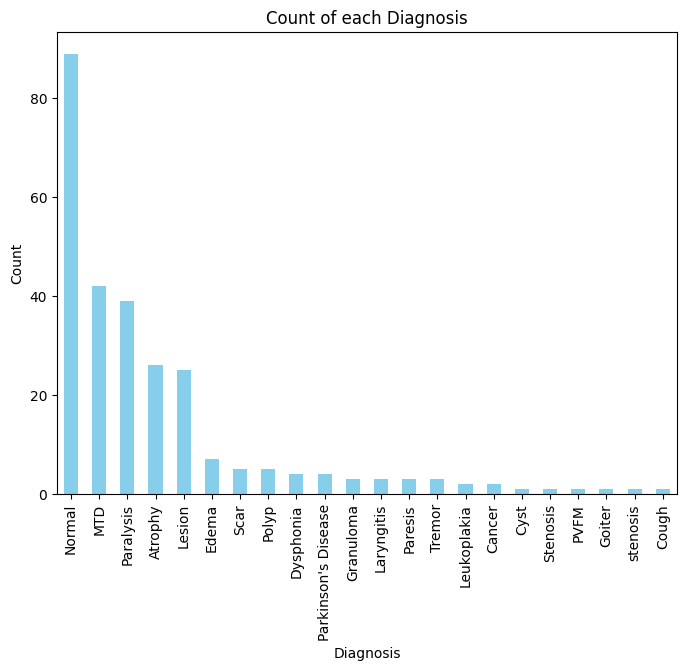

In [ ]:
plt.figure(figsize=(8, 6))
df.Diagnosis.value_counts().plot(kind='bar', color='skyblue')
plt.title('Count of each Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

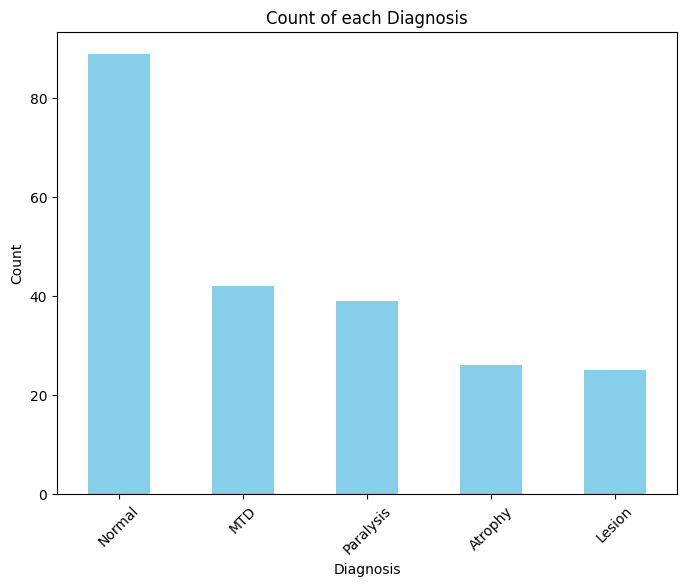

In [ ]:
plt.figure(figsize=(8, 6))
majority_df.Diagnosis.value_counts().plot(kind='bar', color='skyblue')
plt.title('Count of each Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## 각 클래스별 분석

# MTD

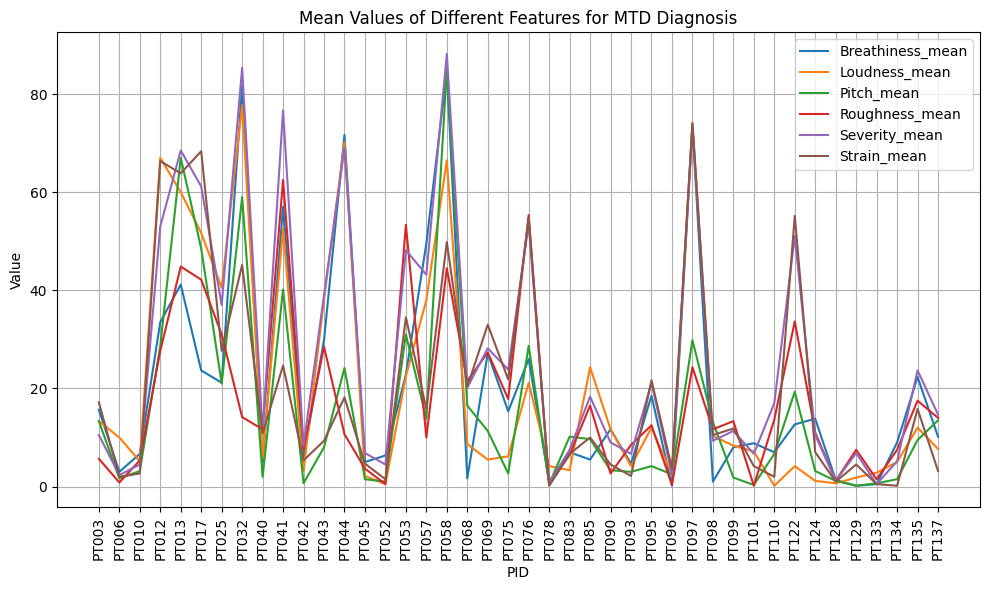

In [ ]:

df_MTD = df[df.Diagnosis == 'MTD']

plt.figure(figsize=(10, 6))

plt.plot(df_MTD['PID'], df_MTD['Breathiness_mean'], label='Breathiness_mean')
plt.plot(df_MTD['PID'], df_MTD['Loudness_mean'], label='Loudness_mean')
plt.plot(df_MTD['PID'], df_MTD['Pitch_mean'], label='Pitch_mean')
plt.plot(df_MTD['PID'], df_MTD['Roughness_mean'], label='Roughness_mean')
plt.plot(df_MTD['PID'], df_MTD['Severity_mean'], label='Severity_mean')
plt.plot(df_MTD['PID'], df_MTD['Strain_mean'], label='Strain_mean')

plt.xlabel('PID')
plt.ylabel('Value')
plt.title('Mean Values of Different Features for MTD Diagnosis')
plt.legend()
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

# Paralysis

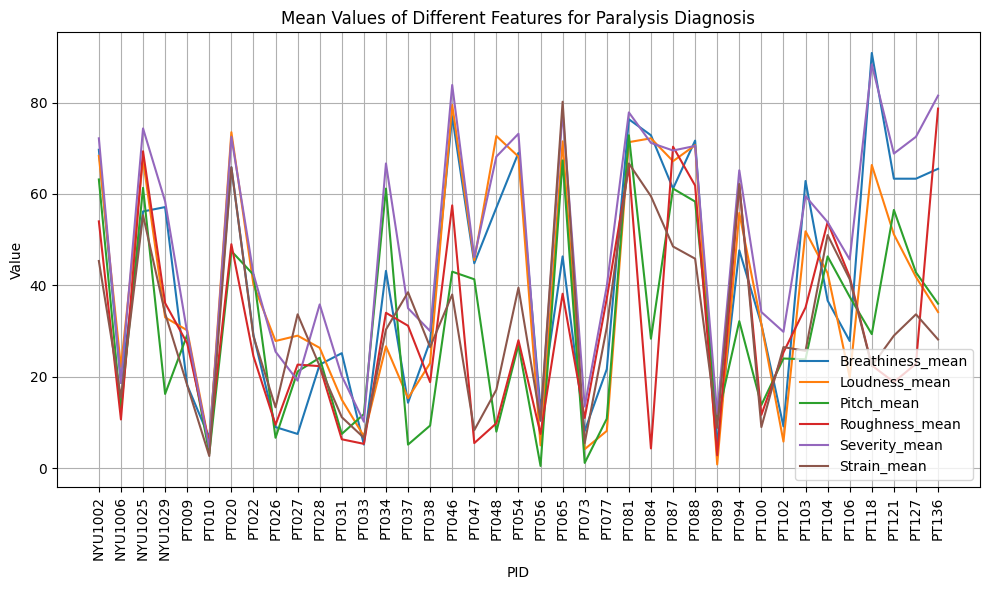

In [ ]:

df_Paralysis = df[df.Diagnosis == 'Paralysis']

plt.figure(figsize=(10, 6))

plt.plot(df_Paralysis['PID'], df_Paralysis['Breathiness_mean'], label='Breathiness_mean')
plt.plot(df_Paralysis['PID'], df_Paralysis['Loudness_mean'], label='Loudness_mean')
plt.plot(df_Paralysis['PID'], df_Paralysis['Pitch_mean'], label='Pitch_mean')
plt.plot(df_Paralysis['PID'], df_Paralysis['Roughness_mean'], label='Roughness_mean')
plt.plot(df_Paralysis['PID'], df_Paralysis['Severity_mean'], label='Severity_mean')
plt.plot(df_Paralysis['PID'], df_Paralysis['Strain_mean'], label='Strain_mean')

plt.xlabel('PID')
plt.ylabel('Value')
plt.title('Mean Values of Different Features for Paralysis Diagnosis')
plt.legend()
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

# Atrophy

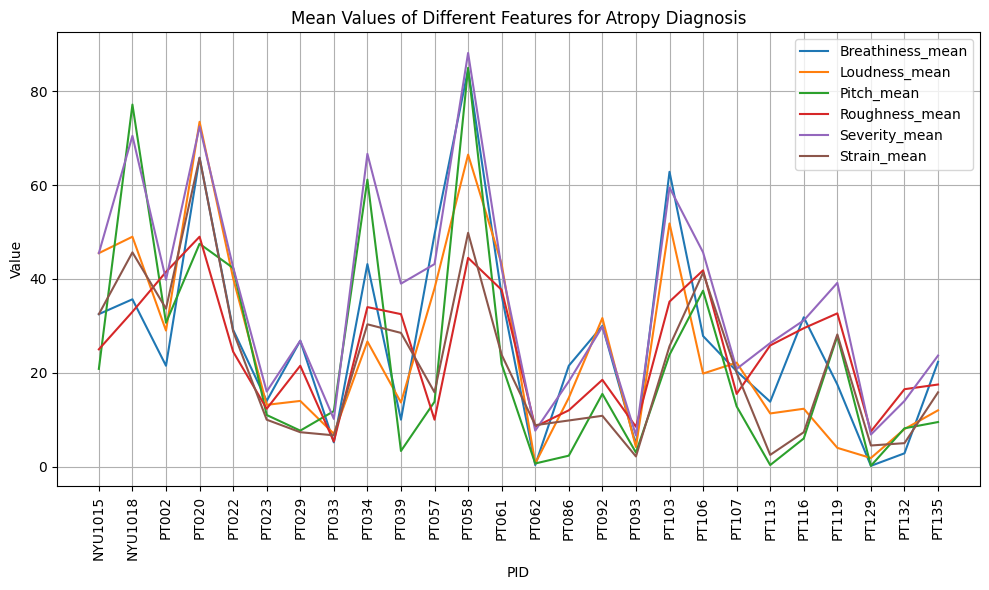

In [ ]:

df_Atrophy = df[df.Diagnosis == 'Atrophy']

plt.figure(figsize=(10, 6))

plt.plot(df_Atrophy['PID'], df_Atrophy['Breathiness_mean'], label='Breathiness_mean')
plt.plot(df_Atrophy['PID'], df_Atrophy['Loudness_mean'], label='Loudness_mean')
plt.plot(df_Atrophy['PID'], df_Atrophy['Pitch_mean'], label='Pitch_mean')
plt.plot(df_Atrophy['PID'], df_Atrophy['Roughness_mean'], label='Roughness_mean')
plt.plot(df_Atrophy['PID'], df_Atrophy['Severity_mean'], label='Severity_mean')
plt.plot(df_Atrophy['PID'], df_Atrophy['Strain_mean'], label='Strain_mean')

plt.xlabel('PID')
plt.ylabel('Value')
plt.title('Mean Values of Different Features for Atropy Diagnosis')
plt.legend()
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

# Lesion



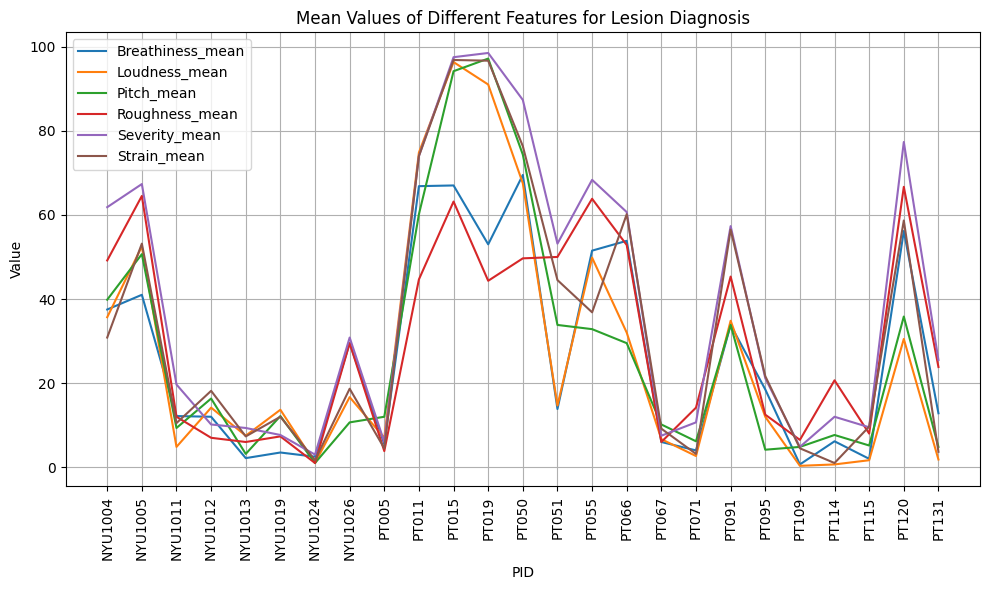

In [ ]:

df_Lesion = df[df.Diagnosis == 'Lesion']

plt.figure(figsize=(10, 6))

plt.plot(df_Lesion['PID'], df_Lesion['Breathiness_mean'], label='Breathiness_mean')
plt.plot(df_Lesion['PID'], df_Lesion['Loudness_mean'], label='Loudness_mean')
plt.plot(df_Lesion['PID'], df_Lesion['Pitch_mean'], label='Pitch_mean')
plt.plot(df_Lesion['PID'], df_Lesion['Roughness_mean'], label='Roughness_mean')
plt.plot(df_Lesion['PID'], df_Lesion['Severity_mean'], label='Severity_mean')
plt.plot(df_Lesion['PID'], df_Lesion['Strain_mean'], label='Strain_mean')

plt.xlabel('PID')
plt.ylabel('Value')
plt.title('Mean Values of Different Features for Lesion Diagnosis')
plt.legend()
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

# 결론

- CAPE-V 지표로 질병을 예측하는 것은 어려워 보임
- 각 Diagnosis에 대해서 Breathiness, Loudness, Pitch, Roughness, Severity, Strain의 지표는 각각 다름
- 결국 지표로 사용할 수있는건 없다고 판단함.

데이터 불균형을 맞춰 보려고도 했지만, 현재로써는 majority class들에 대한 데이터만 사용하기로 결정

In [ ]:
majority_classes = ['Normal', 'MTD', 'Paralysis', 'Atrophy', 'Lesion']
majority_df = df[df['Diagnosis'].isin(majority_classes)]
minority_df = df[~df['Diagnosis'].isin(majority_classes)]
minority_df.to_csv("/content/drive/MyDrive/데이터 마이닝/project/processed_data/minoirty_classes.csv", index=False)
majority_df.to_csv("/content/drive/MyDrive/데이터 마이닝/project/processed_data/majority_classes.csv", index=False)
